# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [116]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [117]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [118]:
# Your code here:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [119]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [120]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [121]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

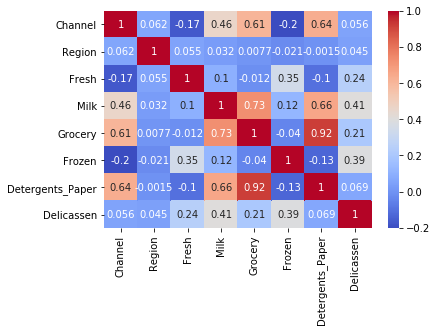

In [122]:
import seaborn as sn
sn.heatmap(customers.corr(), annot=True, cmap='coolwarm');

''

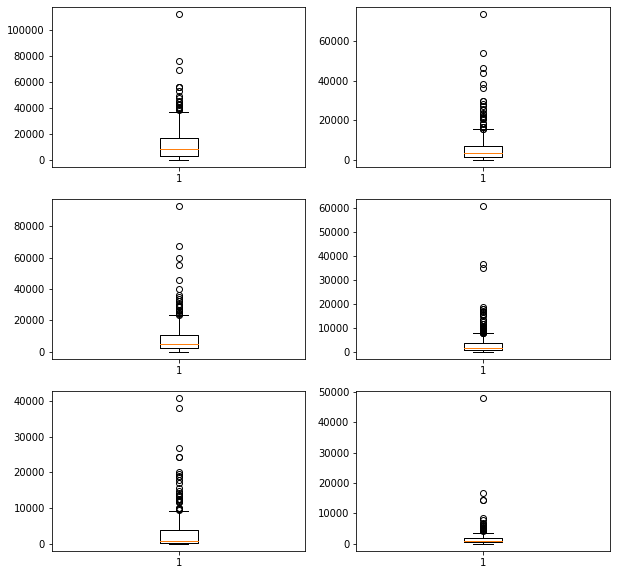

In [123]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
axes[0][0].boxplot(customers.Fresh,)
axes[0][1].boxplot(customers.Milk)
axes[1][0].boxplot(customers.Grocery)
axes[1][1].boxplot(customers.Frozen)
axes[2][0].boxplot(customers.Detergents_Paper)
axes[2][1].boxplot(customers.Delicassen)
;

In [124]:
# Your observations here
# All columns with the same format > int64
# No missed values
# High correlation between how much people spend in Detergents_Paper and Grocery
# All columns have a large amount of outliers that have been analyzed 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [125]:
customers.shape

(440, 8)

In [126]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [127]:
# Your code here
Q1 = customers[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].quantile(0.25)
print(Q1)
Q3 = customers[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].quantile(0.75)
print(Q3)

Fresh               3127.75
Milk                1533.00
Grocery             2153.00
Frozen               742.25
Detergents_Paper     256.75
Delicassen           408.25
Name: 0.25, dtype: float64
Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicassen           1820.25
Name: 0.75, dtype: float64


In [128]:
from scipy import stats
customers_new = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]
customers_new.shape

(414, 8)

In [129]:
# Your comment here
#High presence of outlier >>> rows have been deleted

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [130]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers_new)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [131]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(customers_scale)

In [132]:
customers_new.loc[:,'labels_KMEANS'] = kmeans.labels_
customers_new

/home/cristopherrl/miniconda3/envs/data_env/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/cristopherrl/miniconda3/envs/data_env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMEANS
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,7
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,7
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,4
436,1,3,39228,1431,764,4510,93,2346,6
437,2,3,14531,15488,30243,437,14841,1867,5
438,1,3,10290,1981,2232,1038,168,2125,3


Count the values in `labels`.

In [133]:
# Your code here:
customers_new['labels_KMEANS'].value_counts()

3    126
1     66
2     50
0     45
6     42
4     36
5     29
7     20
Name: labels_KMEANS, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [134]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5).fit(customers_scale)
customers_new['labels_DBSCAN'] = dbscan.labels_
customers_new.head()

/home/cristopherrl/miniconda3/envs/data_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMEANS,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,7,-1
3,1,3,13265,1196,4221,6404,507,1788,4,-1
4,2,3,22615,5410,7198,3915,1777,5185,7,-1


Count the values in `labels_DBSCAN`.

In [135]:
# Your code here
customers_new['labels_DBSCAN'].value_counts()

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [136]:
labels_KMEANS = customers_new['labels_KMEANS']
labels_DBSCAN = customers_new['labels_DBSCAN']

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

''

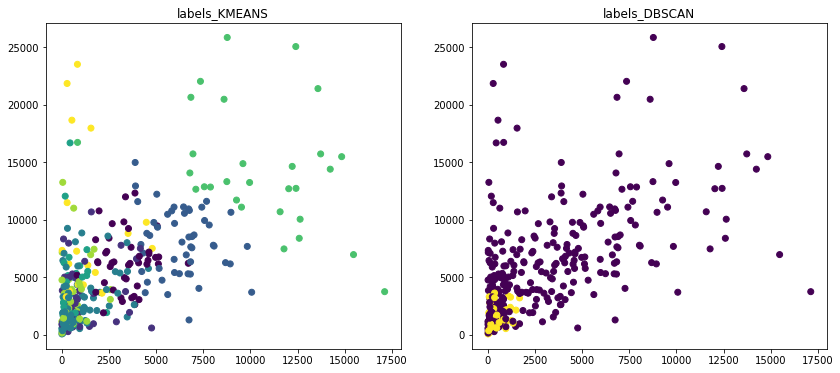

In [137]:
# Your code here:
fig , axes = plt.subplots( ncols=2, nrows=1,figsize = (14,6))

axes[0].scatter(customers_new['Detergents_Paper'], customers_new['Milk'], c=labels_KMEANS)
axes[0].set_title('labels_KMEANS')

axes[1].scatter(customers_new['Detergents_Paper'], customers_new['Milk'], c=labels_DBSCAN)
axes[1].set_title('labels_DBSCAN')
;

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

''

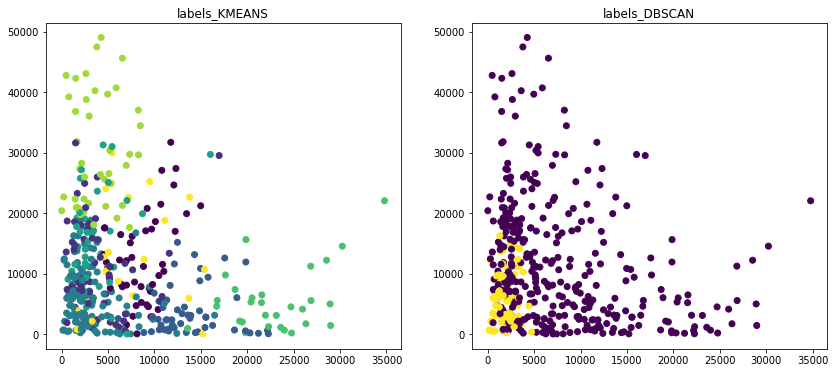

In [138]:
# Your code here:
fig , axes = plt.subplots( ncols=2, nrows=1,figsize = (14,6))

axes[0].scatter(customers_new['Grocery'], customers_new['Fresh'], c=labels_KMEANS)
axes[0].set_title('labels_KMEANS')

axes[1].scatter(customers_new['Grocery'], customers_new['Fresh'], c=labels_DBSCAN)
axes[1].set_title('labels_DBSCAN')
;

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

''

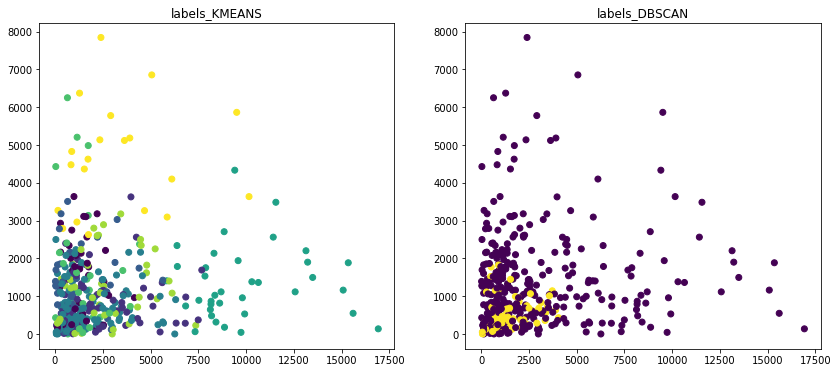

In [139]:
# Your code here:
fig , axes = plt.subplots( ncols=2, nrows=1,figsize = (14,6))

axes[0].scatter(customers_new['Frozen'], customers_new['Delicassen'], c=labels_KMEANS)
axes[0].set_title('labels_KMEANS')

axes[1].scatter(customers_new['Frozen'], customers_new['Delicassen'], c=labels_DBSCAN)
axes[1].set_title('labels_DBSCAN')
;

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [115]:
# Your code here:
customers_new.groupby(['labels_KMEANS', 'labels_DBSCAN']).mean()

Channel    Region         Fresh          Milk  \
labels_KMEANS labels_DBSCAN                                                   
0             -1             1.000000  2.915254   6819.084746   3611.966102   
               0             1.000000  3.000000   6218.647887   1521.352113   
1             -1             1.375000  2.437500   9429.000000  11691.437500   
2             -1             1.045455  2.863636  29611.750000   3206.727273   
3             -1             1.980000  2.860000  11967.700000   6222.640000   
4             -1             1.045455  1.196970  10170.651515   2657.636364   
5             -1             1.054054  2.783784  15017.864865   3688.054054   
6             -1             2.000000  2.400000   5957.640000  13858.280000   
7             -1             1.934783  2.608696   3538.847826   8657.456522   

                                  Grocery       Frozen  Detergents_Paper  \
labels_KMEANS labels_DBSCAN                                                
0             -1              4680.067797  1679.711864       1027.745763   
               0              1940.478873  1428.915493        410.788732   
1             -1              8708.000000  3537.312500       2186.562500   
2             -1              3967.454545  2593.840909        640.545455   
3             -1              9042.700000  1316.220000       3562.540000   
4             -1              3646.712121  2581.848485        886.272727   
5             -1              3779.513514  9743.189189        516.621622   
6             -1             23336.760000  1576.080000      11120.600000   
7             -1             14720.456522  1049.195652       6431.782609   

                              Delicassen    labels  
labels_KMEANS labels_DBSCAN                         
0             -1             1039.762712  2.000000  
               0              565.563380  2.000000  
1             -1             5161.562500  0.812500  
2             -1             1359.477273  1.272727  
3             -1             1468.760000  0.120000  
4             -1              849.181818  1.863636  
5             -1             1366.621622  1.054054  
6             -1             1620.000000  0.000000  
7             -1             1044.673913  0.000000

Which algorithm appears to perform better?

In [ ]:
# Your observations here
#KMEANS considers too much dispersion analyzing plots and means >> DBSCAN is better

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here